array [[[1.         1.         1.         1.         1.         1.
   0.66118924 1.         1.         1.        ]
  [0.95009225 0.93039768 1.         0.99268688 0.96185766 1.
   1.         1.         1.         1.        ]
  [1.         1.         0.97991202 1.         1.         1.
   1.         1.         0.9785222  1.        ]]

 [[1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.        ]]

 [[1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.        ]
  [1.         1.         1.         1.         1.         1.
   1.         1.         1.         1.        ]]]
delay 0

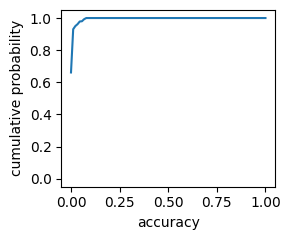

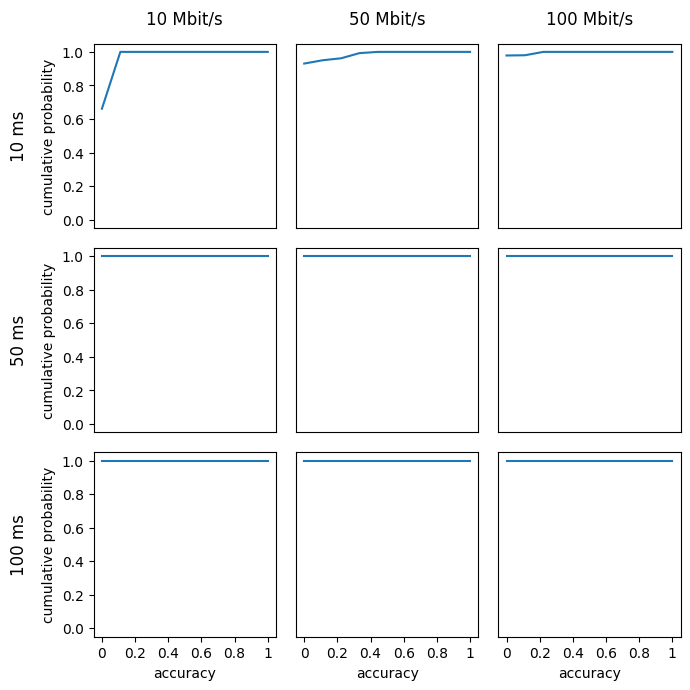

In [146]:
import numpy as np

filename = 'results_pfifo_new_tonopah.txt'
with open(f'good_results/{filename}') as f:
    array = np.array(eval(f.read()))
print("array", array)

for delay in range(len(array)):
    for rate in range(len(array[0])):
        print("delay", delay, "rate", rate, "quartiles", round(np.quantile(array[delay][rate], 0.25), 2), 
                round(np.quantile(array[delay][rate], 0.5), 2),
                round(np.quantile(array[delay][rate], 0.75), 2))
print("accuracy", np.mean(array.flatten()), 'std', np.std(array.flatten()),
     "quantiles", np.quantile(array.flatten(), 0.05), np.quantile(array.flatten(), 0.5), np.quantile(array.flatten(), 0.95))

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter

flattened_array = array.flatten()
plt.figure(figsize=(3,2.5))
plt.ylim(-0.05, 1.05)
plt.xlabel("accuracy")
plt.ylabel("cumulative probability")
plt.plot(np.linspace(0, 1, len(flattened_array)), np.sort(flattened_array))
plt.tight_layout()
plt.savefig(f"plots/{filename.split('.')[0]}.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

bws = [10, 50, 100]
delays = [10, 50, 100]

fd = {
    'fontsize': matplotlib.rcParams['axes.titlesize'],
    'fontweight' : matplotlib.rcParams['axes.titleweight'],
    'verticalalignment': 'center',
    'horizontalalignment': 'center'}


fig, axs = plt.subplots(3, 3, figsize=(7, 7))
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(len(array)): 
    for j in range(len(array[i])):
        special = False
        if j==0:
            axs[i][j].text(-0.5, 0.5, f'{delays[i]} ms', rotation='vertical', fontdict=fd)
            axs[i][j].set_ylabel('cumulative probability')
        if i==0:
            axs[i][j].text(0.5, 1.2, f'{bws[j]} Mbit/s', fontdict=fd)
        if i==2:
            axs[i][j].set_xlabel('accuracy')
        if i!=2:
            axs[i][j].set_xticks([], [])
        else:
            axs[i][j].xaxis.set_major_formatter(FormatStrFormatter('%g'))
            axs[i][j].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        if j!=0:
            axs[i][j].set_yticks([], [])
        x = np.linspace(0., 1., len(array[i,j]))
        y = np.sort(array[i,j])
        axs[i][j].set_ylim(-0.05, 1.05)
        axs[i][j].plot(x, y)
plt.tight_layout()
plt.savefig(f"plots/{filename.split('.')[0]}_all.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [116]:
import numpy as np
import scipy.stats

thing = 'delay'

with open('good_results/'+thing+'_results_fq_new_tonopah.txt') as f:
    array = np.array(eval(f.read()))[:,:,:]
    if thing == 'bw':
        array[:,:,:] /= np.array([10, 50, 100])[None,:,None]
        array /= 90.
print("tonopah array", array)
tonopah_flat_array = np.array(array).flatten()
print("tonopah mean", np.mean(tonopah_flat_array), "std", np.std(tonopah_flat_array))

with open('good_results/'+thing+'_results_fq_newreno.txt') as f:
    array = np.array(eval(f.read()))[:,:,:]
    if thing == 'bw':
        array[:,:,:] /= np.array([10, 50, 100])[None,:,None]
        array /= 90.
print("newreno array", array)
newreno_flat_array = np.array(array).flatten()
print("newreno mean", np.mean(newreno_flat_array), "std", np.std(newreno_flat_array))

print('newreno/tonopah', np.mean(newreno_flat_array)/np.mean(tonopah_flat_array))

scipy.stats.ttest_ind(tonopah_flat_array, newreno_flat_array, equal_var=False)

tonopah array [[[ 5.12924089  3.9017228   4.95225112  5.61512331  5.18490701
    3.90010655  5.12779051 21.01095848 29.16629574  8.75159039]
  [ 2.37776149  2.34020197  3.59592818  5.71794794  3.79212203
    3.80513482  7.43599898  3.78371406  2.78460863  3.92702566]
  [ 2.35306814  2.20793692  2.39767411  3.10241774  2.23305481
    3.05991542  2.28863764  2.12905631  2.92359042  2.28409948]]

 [[ 5.27903886  5.71040877  3.72271879  5.74632829  3.42424089
    3.52837116  3.58319177  5.66872815  5.60417025  5.49485976]
  [ 1.85401328  1.91696141  1.8050738   1.72412087  1.77208029
    1.81309489  1.86580225  1.8602519   1.84760619  1.82576196]
  [ 1.33445473  1.11757838  1.05601538  1.25985888  1.23910871
    1.29176528  1.28831242  1.20143511  1.1640993   1.15081726]]

 [[ 3.70959651  4.24317132  3.7856248   4.24239841  3.40926374
    3.76273744  3.65260613  3.97200129  4.21730906  3.80634528]
  [ 1.02956139  1.2391868   1.21268179  1.11747998  1.25513768
    1.28244766  1.21441159  1.

Ttest_indResult(statistic=-12.565735283458698, pvalue=9.164436649555211e-22)

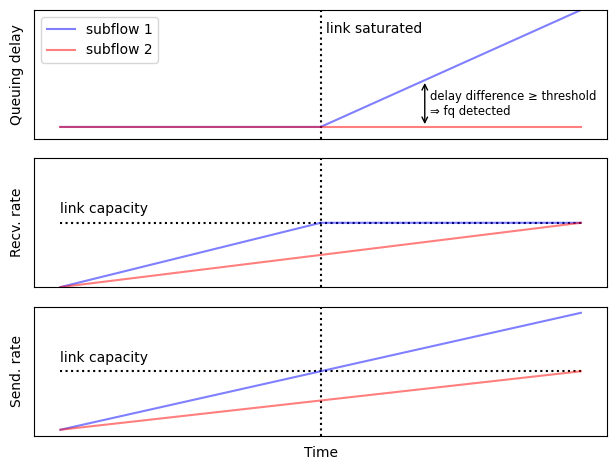

In [145]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)
ax3.set_xlabel('Time')
ax3.set_ylabel('Send. rate')
ax2.set_ylabel('Recv. rate')
ax1.set_ylabel('Queuing delay')
ax3.set_xticks([])
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
plt.subplots_adjust(hspace=.0)
ax3.text(0.0, 0.58, 'link capacity')
ax2.set_ylim(0, 1)
ax2.text(0.0, 0.58, 'link capacity')
ax1.set_ylim(-0.1, 1)
ax3.axvline(x=0.5, linestyle=':', color='black')
ax2.axvline(x=0.5, linestyle=':', color='black')
ax1.axvline(x=0.5, linestyle=':', color='black')

ax3.plot((0, 1), (0.5, 0.5), 'k:')
ax2.plot((0, 1), (0.5, 0.5), 'k:')
ax3.plot((0, 1), (0, 1), color='blue', alpha=0.5)
ax3.plot((0, 1), (0, 0.5), color='red', alpha=0.5)

fq = True
if fq:
    ax2.plot((0, 0.5, 1), (0, 0.5, 0.5), color='blue', alpha=0.5)
    ax2.plot((0, 1), (0, 0.5), color='red', alpha=0.5)
    ax1.plot((0, 0.5, 1), (0, 0, 1.0), color='blue', alpha=0.5, label='subflow 1')
    ax1.plot((0, 1), (0, 0), color='red', alpha=0.5, label='subflow 2')
    ax1.text(0.51, 0.8, 'link saturated')
    ax1.annotate('', xy=(0.7,0.4), xytext=(0.7,0), arrowprops=dict(arrowstyle='<->'))
    ax1.text(0.71, 0.1, 'delay difference ≥ threshold\n⇒ fq detected', fontdict={'fontsize': 'small'})
else:
    ax2.plot((0, 0.5, 1), (0, 0.5, 0.5), color='blue', alpha=0.5)
    ax2.plot((0, 0.5, 1), (0, 0.25, 0.25), color='red', alpha=0.5)
    ax1.plot((0, 0.5, 1), (0, 0, 1.0), color='blue', alpha=0.5, label='subflow 1')
    ax1.plot((0, 0.5, 1), (0, 0, 1.0), color='red', alpha=0.5, label='subflow 2')
    ax1.text(0.51, 0.8, 'link saturated')    

ax1.legend()

plt.tight_layout()
plt.savefig(f"plots/concept_{'fq' if fq else 'fcfs'}.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()